In [6]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os,glob
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# Plotting libraries
import matplotlib as mpl


In [2]:
!pwd

/Users/izidinep/Documents/KNMI/WWA/WWA_Training_stuff/IPSL/2.attribute


In [3]:
fit_eval = pd.read_csv("europe.FIT-PARAMETERS.EVAL.tx7x.CMIP6", header = None, sep = " +", engine = "python")
col=["Model","shift","Sigma best","Sigma lower","Sigma upper","Shape best","Shape lower","Shape upper"]
fit_eval.columns=col

In [4]:
fit_eval

,Model,shift,Sigma best,Sigma lower,Sigma upper,Shape best,Shape lower,Shape upper
0,ACCESS-CM2,FIT-PARAMETERS,1.09,0.81,1.25,-0.12,-0.45,0.10
1,ACCESS-ESM1-5,FIT-PARAMETERS,1.43,1.10,1.68,-0.36,-0.56,-0.14
2,CanESM5,FIT-PARAMETERS,1.28,0.88,1.52,-0.39,-0.55,-0.11
3,CMCC-ESM2,FIT-PARAMETERS,1.43,1.07,1.63,-0.26,-0.59,-0.10
4,CNRM-CM6-1-HR,FIT-PARAMETERS,1.43,1.12,1.62,-0.25,-0.45,-0.05
5,CNRM-CM6-1,FIT-PARAMETERS,1.27,0.89,1.54,-0.39,-0.56,-0.19
6,EC-Earth3,FIT-PARAMETERS,1.14,0.83,1.35,-0.13,-0.27,0.06
7,EC-Earth3-Veg,FIT-PARAMETERS,1.22,0.82,1.47,-0.25,-0.50,0.06
8,EC-Earth3-Veg-LR,FIT-PARAMETERS,1.26,0.98,1.46,-0.21,-0.39,-0.05
9,FGOALS-g3,FIT-PARAMETERS,1.26,0.98,1.46,-0.21,-0.39,-0.05


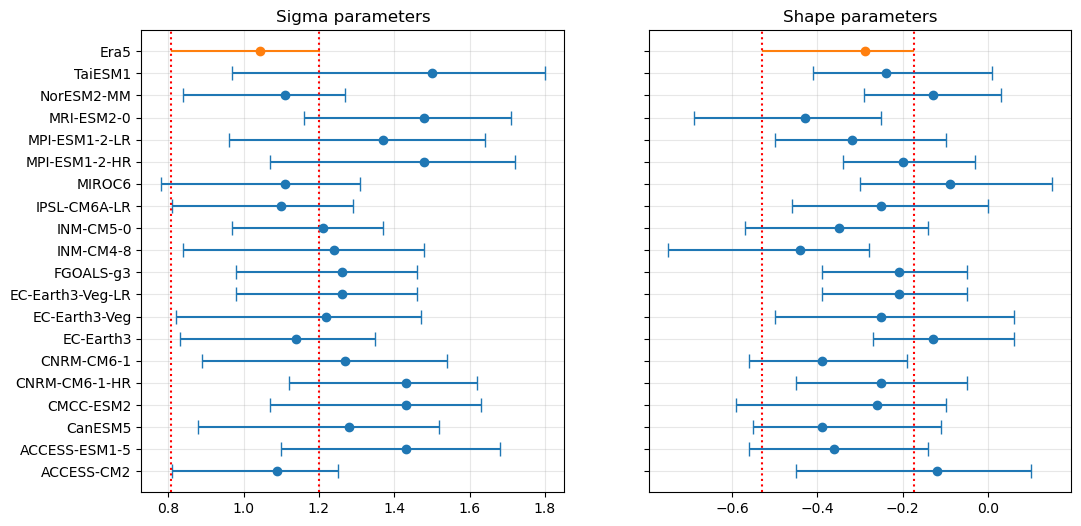

In [5]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

asymmetric_error1=[fit_eval['Sigma best'].values-fit_eval['Sigma lower'].values,fit_eval['Sigma upper'].values-fit_eval['Sigma best'].values]
ax0.errorbar(fit_eval['Sigma best'],fit_eval['Model'],fmt='o',xerr=asymmetric_error1,capsize=5)

era_error1=[[1.043-0.808],[1.2-1.04]]
ax0.errorbar(1.043,'Era5',fmt='o',xerr=era_error1)
ax0.axvline(0.808, color='r',linestyle='dotted') #de bilt lower bound
ax0.axvline(1.2, color='r',linestyle='dotted') #de bilt upper bound
ax0.grid(alpha=0.3)
ax0.set(title = "Sigma parameters")


asymmetric_error2=[fit_eval['Shape best'].values-fit_eval['Shape lower'].values,fit_eval['Shape upper'].values-fit_eval['Shape best'].values]
ax1.errorbar(fit_eval['Shape best'],fit_eval['Model'],fmt='o',xerr=asymmetric_error2,capsize=5)

era_error2=[[-0.288+0.529],[-0.174+0.288]]
ax1.errorbar(-0.288,'Era5',fmt='o',xerr=era_error2)
ax1.axvline(-0.529, color='r',linestyle='dotted') #de bilt lower bound
ax1.axvline(-0.174, color='r',linestyle='dotted') #de bilt upper bound
ax1.grid(alpha=0.3)
ax1.set(title = "Shape parameters")
plt.show()

If best estimate is within the uncertainty of De Bilt the model = 'good'

If best estimate is outside but error bar is within the uncertainty of De Bilt the model = 'reasonable'

If best estimate and error is outside the uncertainty of De Bilt the model = 'bad'

good + reasonable = reasonable

... + bad = bad

CMCC-ESM2, EC-Earth3-Veg-LR, INM-CM4-8, INM-CM5-0, NorESM2-LM = Bad
